In [1]:
#!pip install tensorflow opencv-python matplotlib

In [2]:
#!pip install tensorflow-gpu

In [3]:
import tensorflow as tf 
import os 
import cv2
import imghdr
import matplotlib.pyplot as plt
import numpy as np


C:\Users\kunda\AppData\Local\Temp\ipykernel_17228\2539725733.py:4: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [4]:
gpu = tf.config.experimental.list_physical_devices('GPU')
gpu

[]

In [5]:
img_dir = "C:\\Users\\kunda\\OneDrive\\Documents\\DataScience\\Projects\\ComputerVison\\Images2"

In [6]:
#os.listdir(os.path.join(img_dir,'lamborghini'))

In [7]:
img = cv2.imread(os.path.join(img_dir,'lamborghini','th10.jpg'))

In [8]:
img.shape

(180, 320, 3)

In [9]:
ext_list = ['jpg', 'jpeg', 'png']

In [10]:
# Remove unwanted images
for dir in os.listdir(img_dir):
    for img in os.listdir(os.path.join(img_dir,dir)):
        img_path = os.path.join(img_dir,dir,img)
        try:
            pic = cv2.imread(img_path)
            t = imghdr.what(img_path)
            if t not in ext_list:
                print("Filetype is not in ext list {}".format(image_path))
                os.remove(image_path)
        except Exception as e:
            print("The issue with the image {}".format(image_path))

In [11]:
data = tf.keras.utils.image_dataset_from_directory(img_dir,batch_size = 14)

Found 91 files belonging to 3 classes.


In [12]:
iter = data.as_numpy_iterator()

In [13]:
batch = iter.next()
len(batch)

2

In [14]:
batch[1]

array([2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 0, 2, 0, 0])

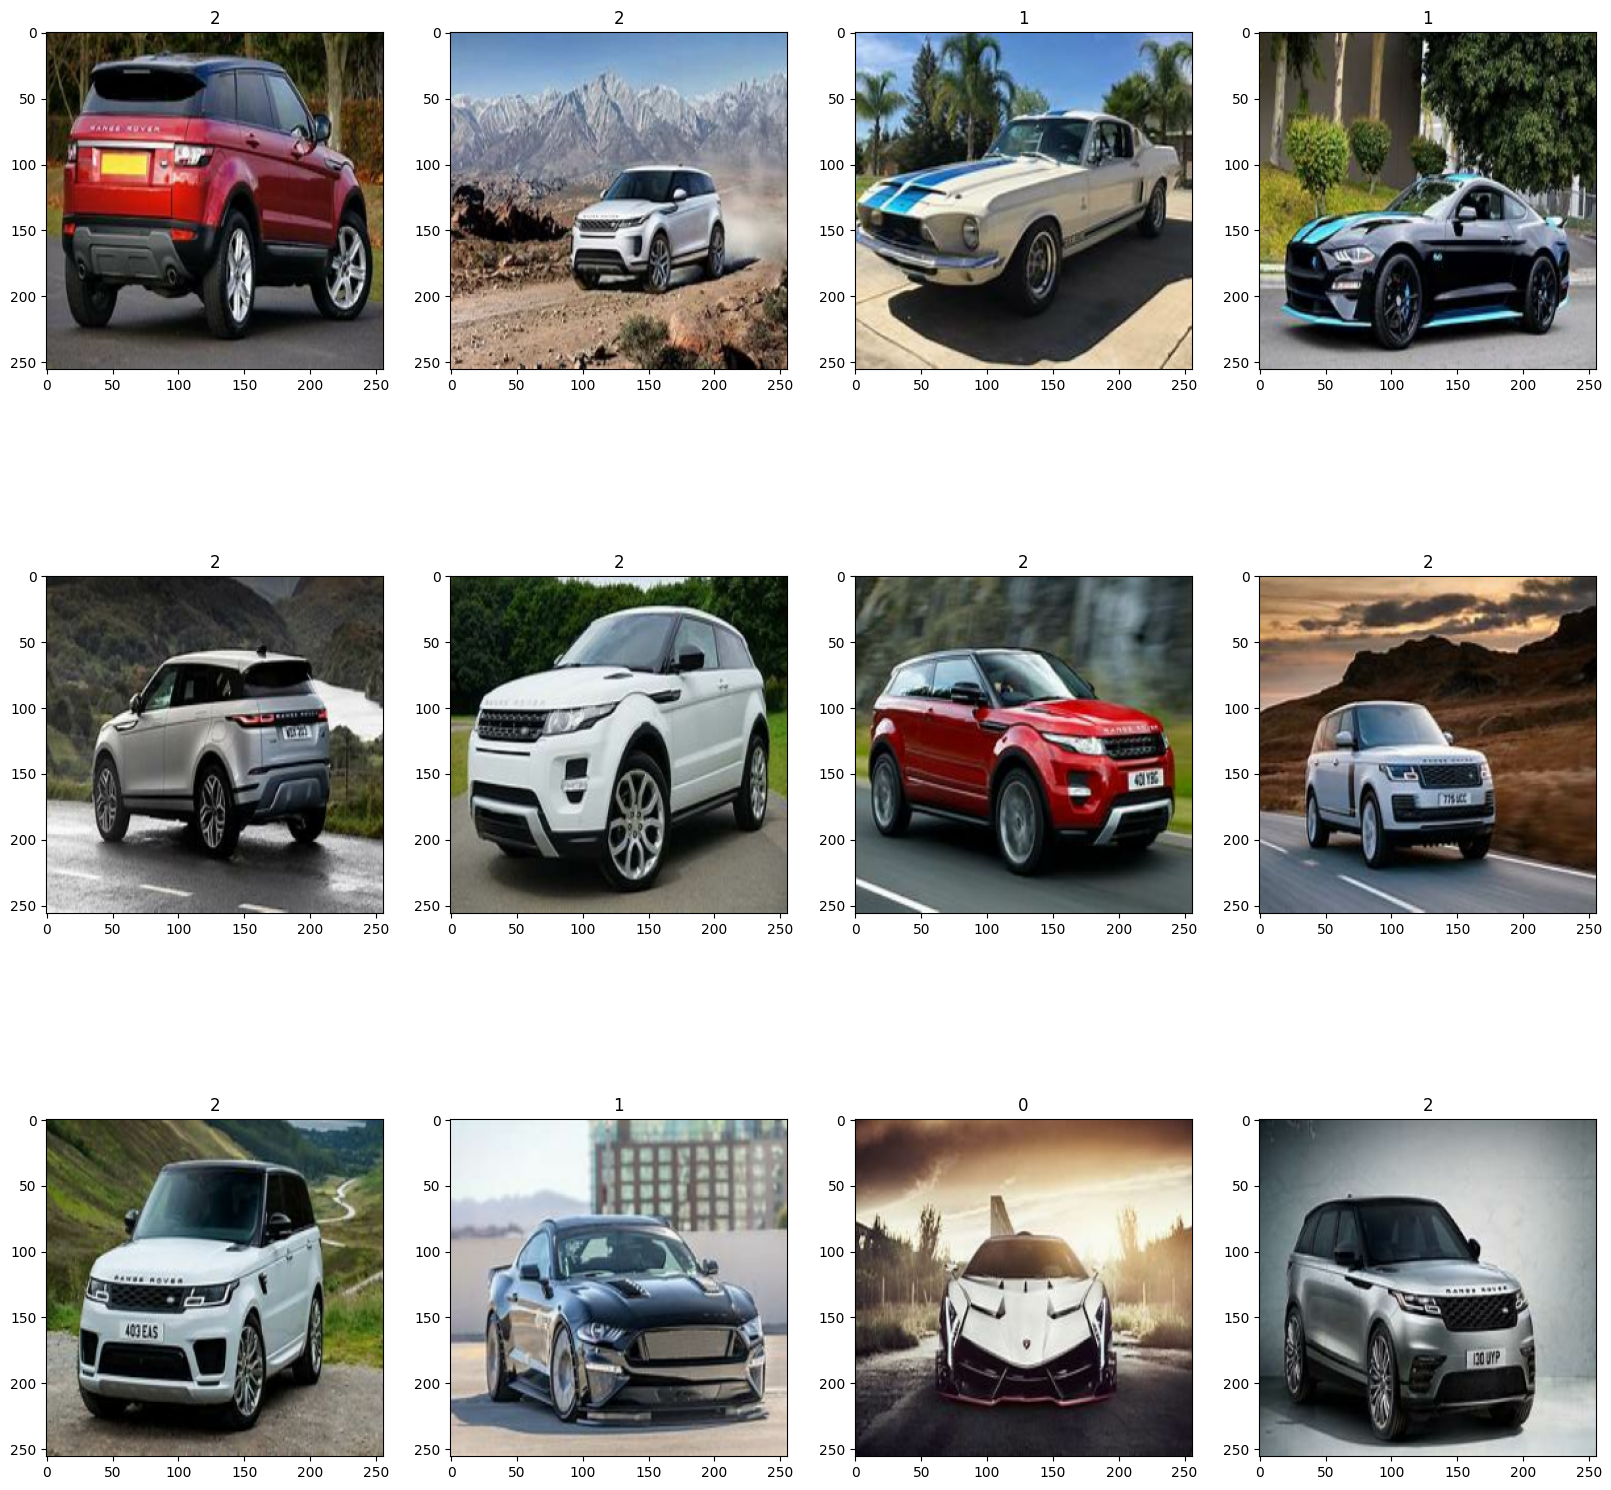

In [15]:
# image display
fig, ax = plt.subplots(3, 4,figsize = (20,20))
for i in range(3):
    for id, img in enumerate(batch[0][4*i:4*(i+1)]):
        ax[i,id].imshow(img.astype(int))
        ax[i,id].title.set_text(batch[1][4*i+id])

## Data Preprocessing
1. Scaling
2. Splitting 

In [16]:
scaled_data = data.map(lambda x,y:(x/255, y))

In [17]:
scaled_iter = scaled_data.as_numpy_iterator()
scaled_iter.next()[0].min(), scaled_iter.next()[0].max()
len(scaled_data)

7

In [18]:
batch = scaled_iter.next()
batch[1]

array([1, 0, 1, 0, 1, 1, 0, 2, 0, 0, 0, 0, 2, 1])

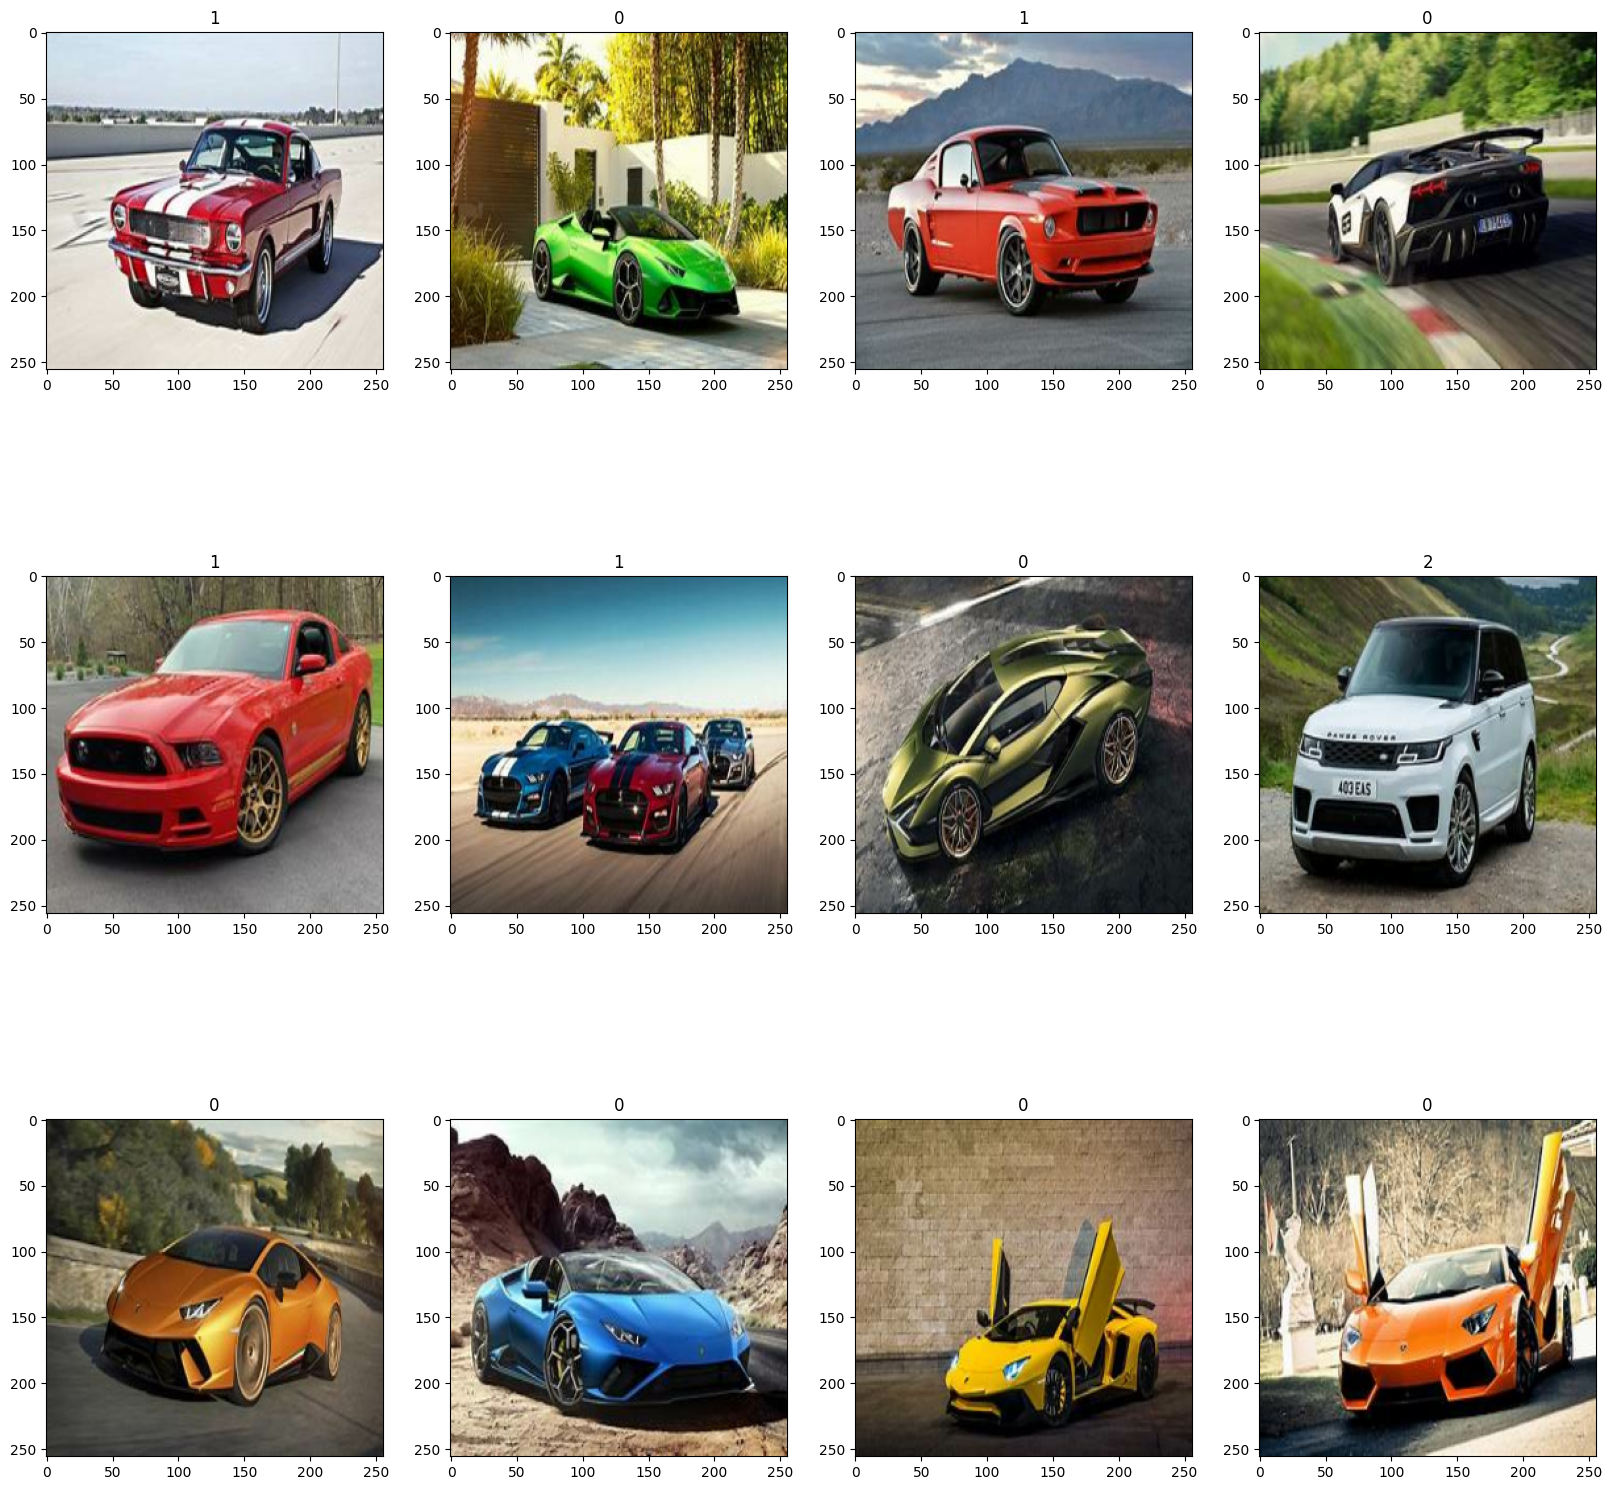

In [20]:
fig, ax = plt.subplots(3, 4,figsize = (20,20))
for i in range(3):
    for id, img in enumerate(batch[0][4*i:4*(i+1)]):
        ax[i,id].imshow(img)
        ax[i,id].title.set_text(batch[1][4*i+id])

0 = Lamborghini ; 1 = Mustang ; 2 Range Rover

In [22]:
train_size = 4 
val_size = 2 
test_size = 1

train = scaled_data.take(train_size)
val = scaled_data.skip(train_size).take(val_size)
test = scaled_data.skip(train_size+val_size).take(test_size)

# Model Development
1. Build Model 
2. Compile with Optimizer
3. Train
4. Plot Training Performance on Train and Val

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [27]:
model = Sequential()

In [28]:
Flatten??

Init signature: Flatten(data_format=None, **kwargs)
Source:        
@keras_export("keras.layers.Flatten")
class Flatten(Layer):
    """Flattens the input. Does not affect the batch size.

    Note: If inputs are shaped `(batch,)` without a feature axis, then
    flattening adds an extra channel dimension and output shape is `(batch, 1)`.

    Args:
      data_format: A string,
        one of `channels_last` (default) or `channels_first`.
        The ordering of the dimensions in the inputs.
        `channels_last` corresponds to inputs with shape
        `(batch, ..., channels)` while `channels_first` corresponds to
        inputs with shape `(batch, channels, ...)`.
        It defaults to the `image_data_format` value found in your
        Keras config file at `~/.keras/keras.json`.
        If you never set it, then it will be "channels_last".

    Example:

    >>> model = tf.keras.Sequential()
    >>> model.add(tf.keras.layers.Conv2D(64, 3, 3, input_shape=(3, 32, 32)))
    >>> model

In [30]:
model.add(Conv2D(16, (3,3), 1, activation = 'relu', input_shape = (256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation = 'relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation = 'relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(64, activation = 'relu'))
model.add(Dense(3, activation = 'softmax'))

In [32]:
model.compile(optimizer = 'adam',
              loss = tf.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics = ['accuracy'])

In [33]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)      

In [35]:
#Training
logdir = 'logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logdir)

In [36]:
mod = model.fit(train, epochs=15, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/15


c:\Users\kunda\anaconda3\envs\comv\Lib\site-packages\keras\backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


4/4 [==============================] - 6s 838ms/step - loss: 1.4485 - accuracy: 0.3214 - val_loss: 1.1327 - val_accuracy: 0.3571
Epoch 2/15
4/4 [==============================] - 3s 654ms/step - loss: 1.1114 - accuracy: 0.4286 - val_loss: 1.0565 - val_accuracy: 0.7143
Epoch 3/15
4/4 [==============================] - 3s 632ms/step - loss: 1.0287 - accuracy: 0.6071 - val_loss: 0.9948 - val_accuracy: 0.4286
Epoch 4/15
4/4 [==============================] - 3s 666ms/step - loss: 1.0620 - accuracy: 0.3929 - val_loss: 0.9181 - val_accuracy: 0.5000
Epoch 5/15
4/4 [==============================] - 2s 608ms/step - loss: 0.9524 - accuracy: 0.5536 - val_loss: 0.9202 - val_accuracy: 0.6429
Epoch 6/15
4/4 [==============================] - 3s 681ms/step - loss: 0.9118 - accuracy: 0.6786 - val_loss: 0.7593 - val_accuracy: 0.8214
Epoch 7/15
4/4 [==============================] - 2s 618ms/step - loss: 0.7577 - accuracy: 0.7679 - val_loss: 0.6495 - val_accuracy: 0.8214
Epoch 8/15
4/4 [===============

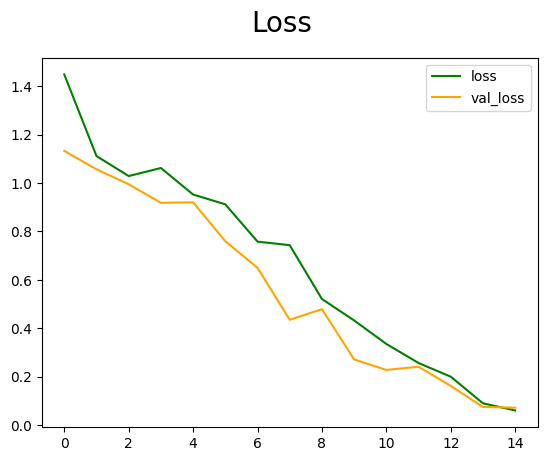

In [40]:
#mod.history
#Performance Plot

fig = plt.figure()
plt.plot(mod.history['loss'], color = 'green', label = 'loss')
plt.plot(mod.history['val_loss'], color = 'orange', label = 'val_loss')
fig.suptitle('Loss', fontsize = 20)
plt.legend(loc = 'upper right')
plt.show()

##Test Evaluation

In [42]:
test_iter = test.as_numpy_iterator()
test_batch = test_iter.next()

In [59]:
len(test)

1

In [48]:
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report

In [77]:
X, y = test_batch


In [78]:
yhat = model.predict(X)
yhat

1/1 [==============================] - 0s 69ms/step


array([[6.5483087e-05, 9.9990070e-01, 3.3804448e-05],
       [2.7670043e-03, 9.9623704e-01, 9.9591783e-04],
       [7.1851077e-06, 9.9998581e-01, 7.0482461e-06],
       [1.3859615e-03, 9.9647826e-01, 2.1358719e-03],
       [5.1336879e-06, 8.5447105e-03, 9.9145013e-01],
       [5.7486415e-01, 4.2117664e-01, 3.9592176e-03],
       [8.7313754e-07, 9.9999917e-01, 4.3465775e-10]], dtype=float32)

In [79]:
fin =[]
for i,j in (enumerate(yhat)):
    fin.append(j.tolist().index(j.max()))
    
fin

[1, 1, 1, 1, 2, 0, 1]

In [80]:
y , fin

(array([1, 1, 1, 1, 2, 0, 1]), [1, 1, 1, 1, 2, 0, 1])

In [81]:


output = pd.DataFrame({'Actual': y, 'Predicted': fin})
output

Actual  Predicted
0       1          1
1       1          1
2       1          1
3       1          1
4       2          2
5       0          0
6       1          1

In [83]:
test_loss, test_accuracy = model.evaluate(X,y,verbose = 2)
print("test accuracy: ", test_accuracy)

1/1 - 0s - loss: 0.0814 - accuracy: 1.0000 - 95ms/epoch - 95ms/step
test accuracy:  1.0


In [84]:
# Save Model
from tensorflow.keras.models import load_model
model.save(os.path.join("Models", "CarClassification.h5"))

In [85]:
car_class = load_model(os.path.join("Models","CarClassification.h5"))
car_class